In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
import seaborn as sns



In [4]:
df= pd.read_csv("/content/drive/MyDrive/Dataset/employee-compensation.csv")

In [5]:
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [6]:
df.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [7]:
df1=df.dropna()

In [8]:
df1.isnull().sum()


Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

In [9]:
cols=df1.columns
for col in cols:
  print(col, 'has :',df1[col].nunique(),"Unique Values")

Organization Group Code has : 7 Unique Values
Job Family Code has : 59 Unique Values
Job Code has : 1210 Unique Values
Year Type has : 2 Unique Values
Year has : 8 Unique Values
Organization Group has : 7 Unique Values
Department Code has : 60 Unique Values
Department has : 109 Unique Values
Union Code has : 70 Unique Values
Union has : 129 Unique Values
Job Family has : 59 Unique Values
Job has : 1348 Unique Values
Employee Identifier has : 309658 Unique Values
Salaries has : 498267 Unique Values
Overtime has : 261976 Unique Values
Other Salaries has : 307729 Unique Values
Total Salary has : 614930 Unique Values
Retirement has : 451568 Unique Values
Health and Dental has : 209844 Unique Values
Other Benefits has : 496051 Unique Values
Total Benefits has : 616180 Unique Values
Total Compensation has : 658354 Unique Values


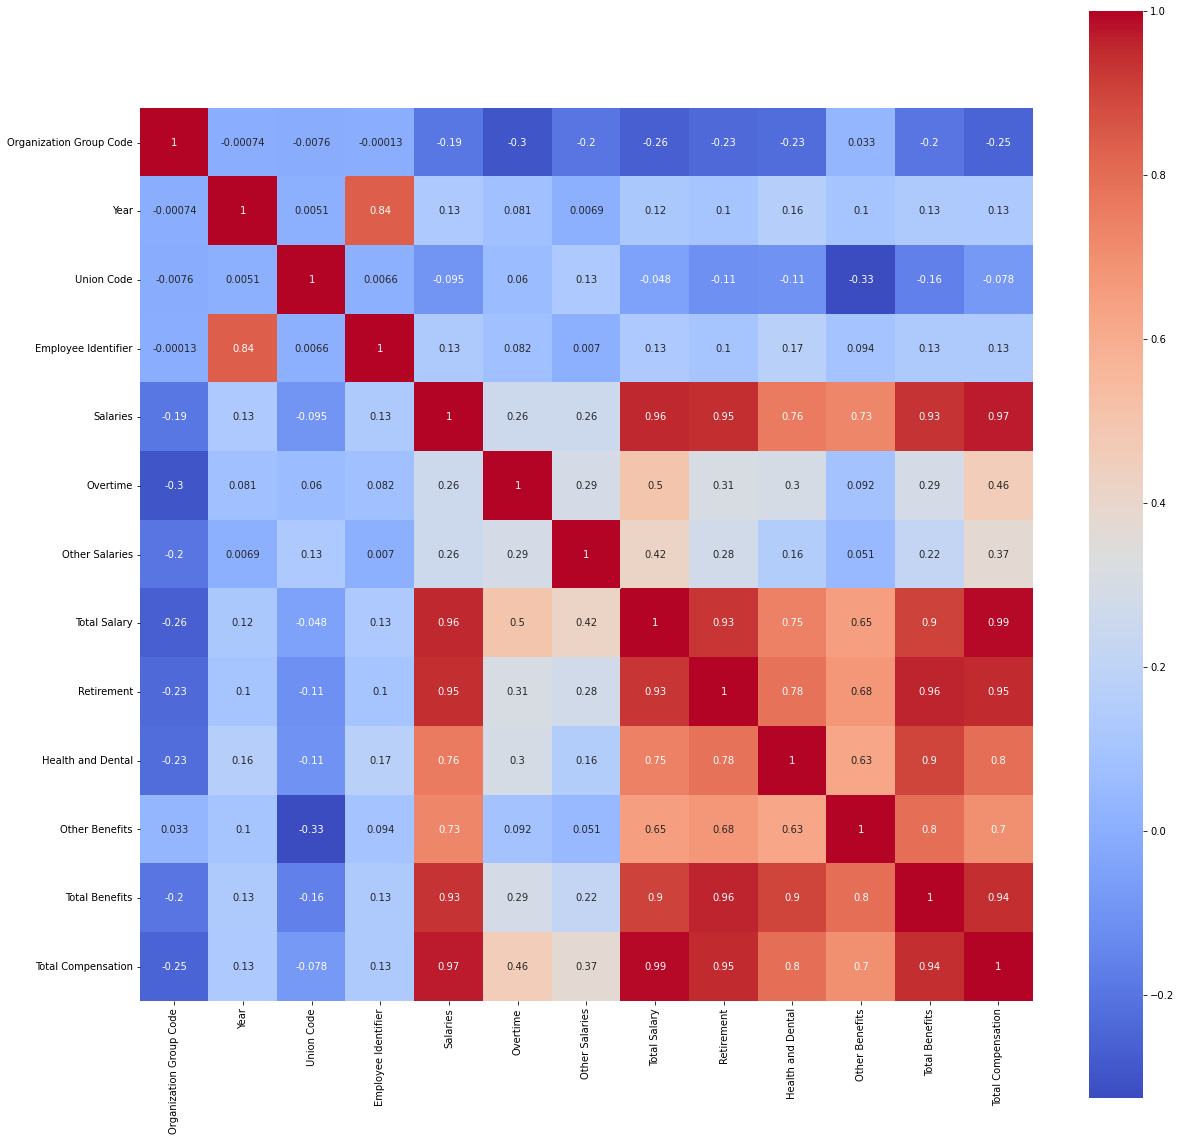

In [10]:
plt.figure(figsize=(20,20))
corr=df1.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',square=True,)
plt.show()

In [11]:
df1.drop({'Organization Group Code','Year','Union Code','Employee Identifier','Overtime','Other Salaries'},axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


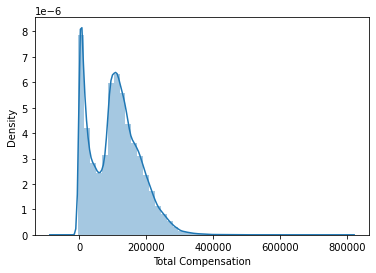

In [12]:
sns.distplot(df1['Total Compensation'])
plt.show()

In [13]:
df1.dtypes

Job Family Code        object
Job Code               object
Year Type              object
Organization Group     object
Department Code        object
Department             object
Union                  object
Job Family             object
Job                    object
Salaries              float64
Total Salary          float64
Retirement            float64
Health and Dental     float64
Other Benefits        float64
Total Benefits        float64
Total Compensation    float64
dtype: object

In [14]:
df2=df1.select_dtypes(include=('int64','float64'))
df2.columns

Index(['Salaries', 'Total Salary', 'Retirement', 'Health and Dental',
       'Other Benefits', 'Total Benefits', 'Total Compensation'],
      dtype='object')

In [15]:
df2['Total Compensation'].skew()


0.409119326382282

In [16]:
df2['Total Compensation'].kurt()

0.020115932230928113

In [17]:
df2.head()

,Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,57534.65,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,57678.50,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,63532.93,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,101274.51,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,5084.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [18]:
df2.drop(['Salaries','Total Salary','Other Benefits','Total Benefits'],axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
df2.head()

,Retirement,Health and Dental,Total Compensation
0,11253.16,11961.34,85281.78
1,10284.88,7176.80,79895.32
2,12495.83,12918.24,93649.71
3,19644.45,12918.24,134237.37
4,1083.90,956.91,7512.31


In [20]:
df2['Health and Retirement']=df2['Retirement']+df2['Health and Dental']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df2.drop({'Retirement','Health and Dental'},axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
df2.head()

,Total Compensation,Health and Retirement
0,85281.78,23214.50
1,79895.32,17461.68
2,93649.71,25414.07
3,134237.37,32562.69
4,7512.31,2040.81


In [23]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled=scaler.fit_transform(df2)
print(scaled)

[[0.18074512 0.32026192]
 [0.174636   0.28603925]
 [0.19023571 0.33334684]
 ...
 [0.2419989  0.3864561 ]
 [0.27050626 0.4169251 ]
 [0.27164402 0.4169251 ]]


K Means Cluster

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans=KMeans(n_clusters=3)

In [26]:
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
print(kmeans.cluster_centers_)

[[ 23557.19479663   5010.15476801]
 [115681.29321116  27638.83411875]
 [207769.2388743   41435.66226855]]


In [28]:
df2.columns

Index(['Total Compensation', 'Health and Retirement'], dtype='object')

In [29]:
y=kmeans.labels_
print(y)

[1 1 1 ... 1 2 2]


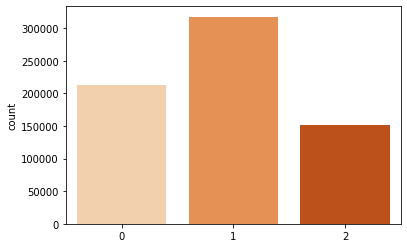

In [30]:
sns.countplot(x=kmeans.labels_,palette="Oranges")
plt.show()

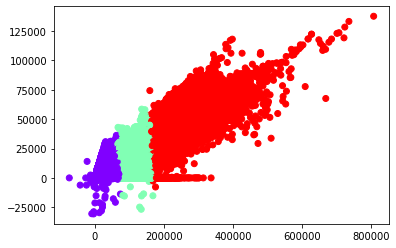

In [31]:
plt.scatter(df2.iloc[:,0],df2.iloc[:,1].values,c=kmeans.labels_,cmap='rainbow')
plt.show()

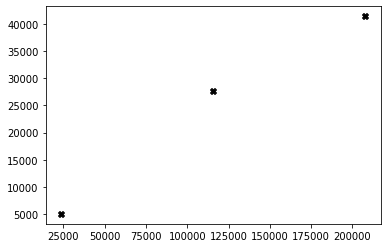

In [32]:
centers=np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0],centers[:,1],marker='X',color='k')

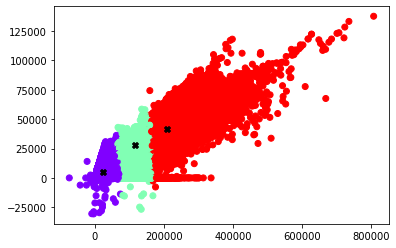

In [33]:
plt.scatter(df2.iloc[:,0],df2.iloc[:,1].values,c=kmeans.labels_,cmap='rainbow')
centers=np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0],centers[:,1],marker='X',color='k')
plt.show()